In [1]:
import re
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as mt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [2]:
data = pd.read_csv('data/01_logistic regression.csv')

data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
data['diagnosis'] = (data['diagnosis']=='M').astype(int)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [3]:
y = data['diagnosis']
X = data.drop(columns='diagnosis')

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

confusion_matrix = mt.confusion_matrix(y_test, predictions)
print('\nConfusion Matrix:\n', confusion_matrix)

accuracy = mt.accuracy_score(y_test, predictions)
print('\nAccuracy:', accuracy)


Confusion Matrix:
 [[61  6]
 [ 5 42]]

Accuracy: 0.9035087719298246


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [5]:
with open('data/04_spam.csv', 'rb') as file:
    encoding = chardet.detect(file.read())['encoding']

data = pd.read_csv('data/04_spam.csv', encoding=encoding)
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [6]:
data = data[['v1', 'v2']]
data.columns=['Label', 'Message']
data.describe().T

,count,unique,top,freq
Label,5572,2,ham,4825
Message,5572,5169,"Sorry, I'll call later",30


In [7]:
data.drop_duplicates(inplace=True)
data.describe().T

,count,unique,top,freq
Label,5169,2,ham,4516
Message,5169,5169,"Go until jurong point, crazy.. Available only ...",1


In [8]:
data.isna().sum()

Label      0
Message    0
dtype: int64

<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

,Label,Message,Message Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


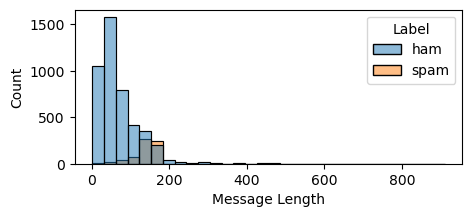

In [9]:
data['Message Length'] = data['Message'].str.len()
display(data.head(3))

plt.figure(figsize=(5,2))
sns.histplot(data, x='Message Length', hue='Label', bins=30) # multiple='dodge'
# data.hist(column='Message Length', by='Label', bins=20)
plt.show()

In [10]:
data['Label'] = (data['Label']=='spam').astype(int)
data.head(3)

,Label,Message,Message Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [11]:
select = re.compile(r'[^a-zA-Z]')
trim = re.compile(r'\s+')
def clean(text): 
    temp = re.sub(select, ' ', text).lower()
    temp = re.sub(trim, ' ', temp).strip()
    return temp

data['Message'] = data['Message'].apply(clean)
data.head(3)

,Label,Message,Message Length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in a wkly comp to win fa cup final ...,155


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [12]:
y = data['Label']

vectorize = CountVectorizer()
X = vectorize.fit_transform(data['Message']) # .toarray()
# print(X.shape)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

confusion_matrix = mt.confusion_matrix(y_test, predictions)
print('\nConfusion Matrix:\n', confusion_matrix)

accuracy = mt.accuracy_score(y_test, predictions)
print('\nAccuracy:', accuracy)


Confusion Matrix:
 [[865  20]
 [  9 140]]

Accuracy: 0.971953578336557


<p style="background-image: linear-gradient(#0aa98f, #FFFFFF 10%)"> &nbsp; </p>

In [14]:
params = {'alpha': np.arange(0.1,  1.1, 0.05)}
grid = GridSearchCV(estimator=model, param_grid=params, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'alpha': 0.1}
0.976784105929279
MultinomialNB(alpha=0.1)


In [15]:
model = grid.best_estimator_
model.fit(X_train, y_train)
predictions = model.predict(X_test)

confusion_matrix = mt.confusion_matrix(y_test, predictions)
print('\nConfusion Matrix:\n', confusion_matrix)

accuracy = mt.accuracy_score(y_test, predictions)
print('\nAccuracy:', accuracy)


Confusion Matrix:
 [[866  19]
 [  7 142]]

Accuracy: 0.9748549323017408


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>